In [4]:
from xlrd import open_workbook

book = open_workbook('de/bo-heft-d-0-201506-xlsx.xlsx')
sheet=book.sheet_by_name("SVB - Tabelle I")

# read header values into the list    
keys = [sheet.cell(9, col_index).value for col_index in xrange(sheet.ncols)]
keys[0]="Berufsgruppen"
keys[1]="Ingesamt"
keys=keys[:4]


dict_list = []
for row_index in xrange(13, sheet.nrows-3):
    d = {keys[col_index]: sheet.cell(row_index, col_index).value 
         for col_index in xrange(0,4)}
    dict_list.append(d)

In [5]:
for i, val in enumerate(dict_list):
    dict_list[i]["KldB"]=val["Berufsgruppen"].split(" ",1)[0]#int(val["Berufsgruppen"].split(" ",1)[0])
    dict_list[i]["Berufsgruppen"]=val["Berufsgruppen"].split(" ",1)[1]

In [6]:
#select only subsub groups
subsubgroups=[]
for i, val in enumerate(dict_list):
    if len(dict_list[i]["KldB"]) ==4:
        subsubgroups.append(dict_list[i])

In [7]:
import pandas as pd
import numpy as np

subsubgroups_df=pd.DataFrame.from_dict(subsubgroups)
subsubgroups_df[~subsubgroups_df[["Frauen","Ingesamt",u'M\xe4nner']].applymap(np.isreal).all(1)]

,Berufsgruppen,Frauen,Ingesamt,KldB,Männer
205,Berufe im Schornsteinbau,*,1553,3213,*
207,Berufe im Fassadenbau,*,1725,3215,*
209,Berufe im Bauwerksabbruch,*,668,3217,*
467,Staatsanwälte/-anwältinnen,*,*,7314,*
469,Berufe im Verfassungsschutz,*,*,7316,*
517,Tierheilpraktiker/innen,24,*,8153,*
519,Führung - Tiermedizin und Tierheilkunde,35,*,8159,*


# Read file with profession_names

In [8]:
book = open_workbook('de/Alphabetisches-Verzeichnis-Berufsbenennungen-Stand12032015.xls')
sheet=book.sheet_by_name("alphabet_Verz_Berufsb")

profession={}
for row_index in xrange(5, sheet.nrows-2):
    profession[sheet.cell(row_index, 0).value]=str(int(sheet.cell(row_index, 1).value))\
    if str(sheet.cell(row_index, 1).value)[0]!="0" else str(sheet.cell(row_index, 1).value)

#     

In [9]:
import re
k=0

g=0
x=0
profession_1={}
profession_2={}
profession_2_2={}
profession_3_0={}
for i in profession:
    if "(e/in)" in i:
        j=i.replace("(e/in)","e")
        x+=1
    elif "(er/in)" in i:
        j=i.replace("(er/in)","er")
    elif "e/r" in i:
        j=i.replace("e/r","er")
    elif "mann/-frau" in i:
        j=i.replace("mann/-frau","mann")
    elif "verk\xe4ufer/in".decode('ISO 8859-16') in i:
        j=i.replace("verk\xe4ufer/in".decode('ISO 8859-16'),"verk\xe4ufer".decode('ISO 8859-16'))
    elif "keramiker/in" in i:
        j=i.replace("keramiker/in","keramiker")
    elif "Medientechnologe/-technologin" in i:
        j=i.replace("Medientechnologe/-technologin","Medientechnologe")
    else:
        j=i.replace("er/in","er")
    j=re.sub("[*?\(\[].*?[\)\]]", "", j).strip() 
    if len(j.split("/"))>2:
        #print i
        k+=1
        profession_3_0[j.split("/")[0]]=profession[i]

    elif len(j.split("/"))==2:
        profession_2[j.split("/")[0].replace("(","").strip()]=profession[i]
        if j.split("/")[1][0].isupper():
            profession_2_2[re.sub("[*?\(\[].*?[\)\]]", "", j.split("/")[1]).strip()]=profession[i]
    else:
        g+=1
        profession_1[j]=profession[i]

In [10]:
print k,len(profession_3_0),len(profession_2),len(profession_1),g,x

327 186 4769 18790 20215 26


In [82]:
#before addine replace("er/in","er")
print k,len(profession_3_0),len(profession_2),len(profession_1),g,x

721 386 17128 2390 2692 26


In [11]:
import json
def load_simple_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)
    

def find_appropriate_prof(page_m,words,profession,profession_2,profession_2_2,profession_1,profession_3_0):
    g=0
    l=0
    s=0
    y=0
    y1=0
    y2=0
    yy=0
    page_m_index={}
    other=[]
    for i in page_m:
        if i in profession.keys():
            page_m_index[i]=profession[i]
        elif i in profession_2.keys():
            page_m_index[i]=profession_2[i]
        elif i in profession_2_2.keys():
            page_m_index[i]=profession_2_2[i]
            l+=1
        elif i in profession_1.keys():
            page_m_index[i]=profession_1[i]
            s+=1
        elif i in profession_3_0.keys():
            page_m_index[i]=profession_3_0[i]
        elif i.replace(" f\xfcr ".decode('ISO 8859-16'), " - ").replace(" im ", " - ") in profession_1.keys():
            page_m_index[i]=profession_1[i.replace(" f\xfcr ".decode('ISO 8859-16'), " - ").replace(" im ", " - ")]
            y1+=1
        elif i.replace(" f\xfcr ".decode('ISO 8859-16'), " - ").replace(" im ", " - ") in profession_2.keys():
            y2+=1
        else:
            for prof in profession_1:
                if i in prof:
                    y+=1
                    print i,"=?",prof, profession_1[prof]
            for prof in profession_2:
                if i in prof:
                    yy+=1
                    print "==",i,"=?",prof, profession_2[prof]

            g+=1
            other.append(i)
            #print i

    print  l,g  ,s  ,y1,y2,y , yy
    return page_m_index,other


# Find code of profession for m_page

In [12]:
words=load_simple_json('de/occupation_all.json')#{masculine:[[],[feminine]]}
page_m=load_simple_json('de/wiki/m_page.json')

page_m_index,other=find_appropriate_prof(page_m,words,profession,profession_2,profession_2_2,profession_1,profession_3_0)

Techniker =? Techniker - Betonbau 32113
Techniker =? Techniker - Datenverarbeitungstechnik 26313
Techniker =? Techniker - Fertigungstechnik 27303
Techniker =? Techniker - Mess- und Regeltechnik 26123
Techniker =? Techniker - Kraftfahrzeugtechnik 25213
Techniker =? Techniker - Fahrzeugbau 25213
Techniker =? Techniker  - Agrartechnik 12103
Techniker =? Techniker - Personenverkehrssysteme 51503
Techniker =? Techniker - Automatisierungstechnik 26123
Techniker =? Techniker - Baubetrieb 31103
Techniker =? Techniker - Mühlenbau, Getreide- u. Futtermitteltechnik 25183
Techniker =? Techniker - Betriebswirtschaft 27303
Techniker =? Techniker - Markscheidetechnik 31213
Techniker =? Techniker - Verfahrenstechnik 41313
Techniker =? Techniker - Maschinenbautechnik 25103
Techniker =? Techniker - Verkehrsbau 31133
Techniker =? Techniker - Optik 21363
Techniker =? Techniker - Lebensmittelverfahrenstechnik 29203
Techniker =? Techniker - Automatisierte Produktion 26123
Techniker =? Techniker - Korrosions

In [13]:
page_m_index["Kettler"]='28122'
page_m_index["Euromaster"]='26314'
page_m_index["Energieelektroniker"]='26252'
page_m_index["Gehilfe"]='72302'
page_m_index["Krankenpfleger"]='81302'
page_m_index["Mitarbeiter"]='61123'
page_m_index["Geograph"]='42134'
page_m_index["Ordner"]='53112'
page_m_index[u'W\xe4chter']='53112'
page_m_index[u'F\xe4rber']='28101'
page_m_index["Religionslehrer"]='84424'
page_m_index[u'Stoffpr\xfcfer']='41322'
page_m_index["Reiniger"]='54101'


#we ommit Kaufmann,Fachkaufmann, Sachverständiger, Angestellter,
#as of being too broaden or representing only one person in the Labour Markt
other_new=set(other) - set(["Meister","Fachpraktiker","Verwalter",u'Sachverst\xe4ndiger',"Kaufmann","Helfer","Trainer",
                            "Vertreter","Facharbeiter",u'Angestellter',"Techniker",u'Fachkaufmann',"Werker",
                            "Fachleiter","Verfahrensmechaniker","Produktionshelfer",
                            "Energieelektroniker",u'Gehilfe',u'Krankenpfleger',u'Kettler',"Euromaster",
                           "Mitarbeiter","Geograph","Ordner",u'W\xe4chter',u'F\xe4rber',"Religionslehrer",u'Stoffpr\xfcfer',
                           "Reiniger"])
print len(other)
print len(other_new)

42
13


In [14]:
other_new

{u'Aufzugsmonteur',
 u'Fachangestellter f\xfcr Medien- und Informationsdienste',
 u'Fachverk\xe4ufer im Lebensmittelhandwerk (B\xe4ckerei)',
 u'Fachverk\xe4ufer im Lebensmittelhandwerk (Fleischerei)',
 u'Kraftfahrer',
 u'Masseur und medizinischer Bademeister',
 u'Online-Redakteur',
 u'Produktgestalter Textil',
 u'Produktpr\xfcfer Textil',
 u'Produktveredler Textil',
 u'Pr\xe4sident',
 u'Vorpolierer Schmuck- und Kleinger\xe4teherstellung',
 u'Werkgehilfe Schmuckwarenindustrie, Taschen- und Armbanduhren'}

In [15]:
manually_retrieved={"Aufzugsmonteur":'25132',
 u'Fachangestellter f\xfcr Medien- und Informationsdienste':'73332',
 u'Fachverk\xe4ufer im Lebensmittelhandwerk (B\xe4ckerei)':'62312',
 u'Fachverk\xe4ufer im Lebensmittelhandwerk (Fleischerei)':'62322',
 u'Kraftfahrer':'51311',
 u'Masseur und medizinischer Bademeister':'81712',
 u'Online-Redakteur':'92413',
 u'Produktgestalter Textil':'28112',
 u'Produktpr\xfcfer Textil':'28122',
 u'Produktveredler Textil':'28142',
 u'Pr\xe4sident':'84394',
 u'Vorpolierer Schmuck- und Kleinger\xe4teherstellung':'24222',
 u'Werkgehilfe Schmuckwarenindustrie, Taschen- und Armbanduhren':'71382'}
for i in manually_retrieved:
    page_m_index[i]=manually_retrieved[i]
len(page_m_index),len(page_m)

(886, 902)

In [16]:
print "We do not took into account:"
set(page_m)-set(page_m_index.keys())

We do not took into account:


{u'Angestellter',
 u'Facharbeiter',
 u'Fachkaufmann',
 u'Fachleiter',
 u'Fachpraktiker',
 u'Helfer',
 u'Kaufmann',
 u'Meister',
 u'Produktionshelfer',
 u'Sachverst\xe4ndiger',
 u'Techniker',
 u'Trainer',
 u'Verfahrensmechaniker',
 u'Vertreter',
 u'Verwalter',
 u'Werker'}

# Masculine_bias

In [17]:
page_m=load_simple_json('de/wiki/m_bias.json')
print len(page_m)
words=load_simple_json('de/occupation_all.json')#{masculine:[[],[feminine]]}
m_bias_index,other=find_appropriate_prof(page_m,words,profession,profession_2,profession_2_2,profession_1,profession_3_0)

784
Meister =? Meister - Schuhfertigung 28393
Meister =? Meister - Buchbinderische Weiterverarbeitung 23493
Meister =? Meister - Getreidewirtschaft 29293
Meister =? Meister - Fernmeldebau 26393
Meister =? Meister - Schmuckindustrie 93593
Meister =? Meister - Energieversorgung und -unterhalt 26293
Meister =? Meister - Modistinnenhandwerk 28293
Meister =? Meister - Walzwerktechnik 24193
Meister =? Meister - Kunststoffchemie 41393
Meister =? Meister - Seefischerei 11493
Meister =? Meister - Fotochemie 41393
Meister =? Meister - Montagebau 31193
Meister =? Meister - Elektroindustrie 26393
Meister =? Meister - Bootsbauerhandwerk 25293
Meister =? Meister - Schlosser- und Schmiedehandwerk 24493
Meister =? Meister - Brunnenbauerhandwerk 32293
Meister =? Meister - Flugzeuginstandhaltung 25293
Meister =? Meister - Landmaschinenmechanikerhandwerk 25293
Meister =? Meister - Metallurgische Erzeugung 24193
Meister =? Meister - Lackiererhandwerk 33293
Meister =? Meister - Photochemie 41393
Meister =?

In [18]:

m_bias_index["Geograph"]='42134'
m_bias_index["Medienkaufmann"]='92302'
m_bias_index["Gehilfe"]='72302'
m_bias_index[u'Stoffpr\xfcfer']='41322'
m_bias_index["Mitarbeiter"]='61123'
m_bias_index[u'W\xe4chter']='53112'
m_bias_index["Krankenpfleger"]='81302'
m_bias_index[u'F\xe4rber']='28101'
m_bias_index["Energieelektroniker"]='26252'
m_bias_index["Religionslehrer"]='84424'


#we ommit Kaufmann,Fachkaufmann, Sachverständiger, Angestellter,
#as of being too broaden or representing only one person in the Labour Markt
other_new=set(other) - set(["Meister","Fachpraktiker",u'Sachverst\xe4ndiger',"Helfer","Trainer",
                            "Facharbeiter","Verfahrensmechaniker",u'Angestellter',"Techniker",u'Fachkaufmann',
                            "Kaufmann","Fachleiter","Produktionshelfer",
                            "Geograph","Medienkaufmann",u'Gehilfe',u'Stoffpr\xfcfer',"Mitarbeiter",
                            u'W\xe4chter',u'Krankenpfleger',u'F\xe4rber',"Religionslehrer","Energieelektroniker"])
print len(other)
print len(other_new)

37
14


In [19]:
other_new

{u'Aufzugsmonteur',
 u'Fachangestellter f\xfcr Medien- und Informationsdienste',
 u'Fachverk\xe4ufer im Lebensmittelhandwerk (B\xe4ckerei)',
 u'Fachverk\xe4ufer im Lebensmittelhandwerk (Fleischerei)',
 u'Film-Regisseur',
 u'Kraftfahrer',
 u'Masseur und medizinischer Bademeister',
 u'Online-Redakteur',
 u'Produktgestalter Textil',
 u'Produktpr\xfcfer Textil',
 u'Produktveredler Textil',
 u'Pr\xe4sident',
 u'Vorpolierer Schmuck- und Kleinger\xe4teherstellung',
 u'Werkgehilfe Schmuckwarenindustrie, Taschen- und Armbanduhren'}

In [20]:
manually_retrieved2={"Aufzugsmonteur":'25132',
 u'Fachangestellter f\xfcr Medien- und Informationsdienste':'73332',
 u'Fachverk\xe4ufer im Lebensmittelhandwerk (B\xe4ckerei)':'62312',
 u'Fachverk\xe4ufer im Lebensmittelhandwerk (Fleischerei)':'62322',
 u'Film-Regisseur':'94414',
 u'Kraftfahrer':'51311',
 u'Masseur und medizinischer Bademeister':'81712',
 u'Online-Redakteur':'92413',
 u'Produktgestalter Textil':'28112',
 u'Produktpr\xfcfer Textil':'28122',
 u'Produktveredler Textil':'28142',
 u'Pr\xe4sident':'84394',
 u'Vorpolierer Schmuck- und Kleinger\xe4teherstellung':'24222',
 u'Werkgehilfe Schmuckwarenindustrie, Taschen- und Armbanduhren':'71382'}
for i in manually_retrieved2:
    m_bias_index[i]=manually_retrieved2[i]
len(m_bias_index),len(page_m)

(771, 784)

In [21]:
print "We do not took into account:"
set(page_m)-set(m_bias_index.keys())

We do not took into account:


{u'Angestellter',
 u'Facharbeiter',
 u'Fachkaufmann',
 u'Fachleiter',
 u'Fachpraktiker',
 u'Helfer',
 u'Kaufmann',
 u'Meister',
 u'Produktionshelfer',
 u'Sachverst\xe4ndiger',
 u'Techniker',
 u'Trainer',
 u'Verfahrensmechaniker'}

# Femenine

In [22]:
page_f=load_simple_json('de/wiki/f_bias.json')
print len(page_f)
words=load_simple_json('de/occupation_all.json')#{masculine:[[],[feminine]]}
f_bias_index,other=find_appropriate_prof(page_f,words,profession,profession_2,profession_2_2,profession_1,profession_3_0)

6
3 0 3 0 0 0 0


In [23]:
f_bias_index

{u'Belegentbindungspfleger': '81353',
 u'Beschlie\xdfer': '83212',
 u'Entbindungspfleger': '81353',
 u'Gleichstellungsbeauftragter': '71234',
 u'Haush\xe4lter': '83212',
 u'Pflegediensthelfer': '81301'}

# Neutral

In [24]:
page_n=load_simple_json('de/wiki/n_bias_male_labels.json')
print len(page_n)
words=load_simple_json('de/occupation_all.json')#{masculine:[[],[feminine]]}
n_bias_index,other=find_appropriate_prof(page_n,words,profession,profession_2,profession_2_2,profession_1,profession_3_0)

20
Audiodesigner =? Audiodesigner - Musik 94183
1 1 9 0 0 1 0


In [25]:
n_bias_index["Audiodesigner"]='94183'
n_bias_index

{u'Apotheker': '81804',
 'Audiodesigner': '94183',
 u'Bote': '51321',
 u'Bundeskanzler': '71214',
 u'Dekorationenmaler': '94612',
 u'Diakon': '83323',
 u'Dichter': '92434',
 u'Direktor': '84194',
 u'Dressman': '94232',
 u'Filmgesch\xe4ftsf\xfchrer': '94494',
 u'Hilfspolizist': '53182',
 u'Host': '63401',
 u'Knecht': '11101',
 u'Medientechniker': '26313',
 u'Messebauer': '33332',
 u'M\xf6nch': '83332',
 u'Ordensbruder': '83332',
 u'Pflegedienstleiter': '81394',
 u'Projektassistent': '26313',
 u'Taxifahrer': '52112'}

In [26]:
page_n_n=load_simple_json('de/wiki/n_bias_n_labels.json')
print len(page_n_n)
words=load_simple_json('de/occupation_all.json')#{masculine:[[],[feminine]]}
n_bias_n_labels_index,other=find_appropriate_prof(page_n_n,words,profession,profession_2,profession_2_2,profession_1,profession_3_0)

36
Fachkraft =? Fachkraft - Trinkwasserinstallationen u. Entwässerungsanlag. 32242
Fachkraft =? Fachkraft für Metalltechnik - Zerspanungstechnik 24232
Fachkraft =? Fachkraft - Textverarbeitung für Blinde und Sehbehinderte 71432
Fachkraft =? Fachkraft - Möbel-, Küchen- und Umzugsservice 22342
Fachkraft =? Fachkraft - Solartechnik 26242
Fachkraft =? Fachkraft - Audiotechnik 94532
Fachkraft =? Fachkraft - Umweltschutz 42313
Fachkraft =? Fachkraft - Veranstaltungstechnik 94512
Fachkraft =? Fachkraft - Arbeitsförderung 83133
Fachkraft =? Fachkraft für Lasertechnik 24243
Fachkraft =? Fachkraft - Merchandising 92122
Fachkraft =? Fachkraft - landwirtschaftlicher Haushalt 83213
Fachkraft =? Beauty-Fachkraft 82322
Fachkraft =? CAD-Fachkraft - Metall 27223
Fachkraft =? CAD-Fachkraft - Bau 27223
Fachkraft =? Fachkraft im Labor 41322
Fachkraft =? Fachkraft - Abwassertechnik 34312
Fachkraft =? Hydraulik-Fachkraft 25183
Fachkraft =? Kaufmännische EDV-Fachkraft 43112
Fachkraft =? SPS-Fachkraft 43122
F

In [27]:
print "We do not took into account:"
other

We do not took into account:


[u'Fachkraft']

In [28]:
n_bias_n_labels_index

{u'Au-pair': '83111',
 u'Aufsichtsperson': '73214',
 u'Bestattungsfachkraft': '82402',
 u'B\xfcrokraft': '71402',
 u'CNC-Fachkraft': '24233',
 u'Elektrofachkraft': '26302',
 u'Elektrofachkraft f\xfcr festgelegte T\xe4tigkeiten': '26212',
 u'Elektroger\xe4tefachkraft': '26312',
 u'Fachkraft f\xfcr Abwassertechnik': '34312',
 u'Fachkraft f\xfcr Agrarservice': '11102',
 u'Fachkraft f\xfcr Arbeitssicherheit': '53123',
 u'Fachkraft f\xfcr Automatenservice': '61142',
 u'Fachkraft f\xfcr Hafenlogistik': '51332',
 u'Fachkraft f\xfcr Holz- und Bautenschutzarbeiten': '33242',
 u'Fachkraft f\xfcr Kreislauf- und Abfallwirtschaft': '34332',
 u'Fachkraft f\xfcr Kurier-, Express- und Postdienstleistungen': '51322',
 u'Fachkraft f\xfcr Lagerwirtschaft': '51312',
 u'Fachkraft f\xfcr Lebensmitteltechnik': '29202',
 u'Fachkraft f\xfcr Lederverarbeitung': '28312',
 u'Fachkraft f\xfcr Metalltechnik': '24202',
 u'Fachkraft f\xfcr M\xf6bel-, K\xfcchen- und Umzugsservice': '22342',
 u'Fachkraft f\xfcr Rohr-, 

# Assign correspondent amount of man/woman at German Labour market

In [29]:
print "We have:",len(m_bias_index)," inctances."
k=0
m_bias_prop=[]
check=[]
for i in m_bias_index:
    for beruf in subsubgroups:
        if beruf['KldB']==m_bias_index[i][:4]:
            if np.isreal(beruf[u'M\xe4nner']):
                m_bias_prop.append({"name":i,
                                "Berufsgruppe":beruf['Berufsgruppen'],
                                "KldB":beruf['KldB'],
                               "KldB5":m_bias_index[i],
                               "Frauen":float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               u'M\xe4nner':100-float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               "Overall":beruf['Ingesamt']})
                check.append(i)
            else:
                for beruf in dict_list:
                    if beruf['KldB']==m_bias_index[i][:3]:
                        if np.isreal(beruf[u'M\xe4nner']):
                            m_bias_prop.append({"name":i,
                                "Berufsgruppe":beruf['Berufsgruppen'],
                                "KldB":beruf['KldB'],
                               "KldB5":m_bias_index[i],
                               "Frauen":float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               u'M\xe4nner':100-float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               "Overall":beruf['Ingesamt']})
                            check.append(i)
                        break
            break
print len(m_bias_prop)
didnot_found=set(m_bias_index.keys())-set(check)
for i in didnot_found:
    for beruf in dict_list:
        if beruf['KldB']==m_bias_index[i][:2]:
            if np.isreal(beruf[u'M\xe4nner']):
                m_bias_prop.append({"name":i,
                                "Berufsgruppe":beruf['Berufsgruppen'],
                                "KldB":beruf['KldB'],
                               "KldB5":m_bias_index[i],
                               "Frauen":float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               u'M\xe4nner':100-float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               "Overall":beruf['Ingesamt']})
                check.append(i)
            break
didnot_found=set(m_bias_index.keys())-set(check)
print len(m_bias_prop)
print didnot_found
with open("de/m_bias_labour.json","w")as f:
    json.dump(m_bias_prop, f, indent=4) 

We have: 771  inctances.
768
771
set([])


In [30]:
print "We have:",len(f_bias_index)," inctances."
k=0
f_bias_prop=[]
check=[]
for i in f_bias_index:
    for beruf in subsubgroups:
        if beruf['KldB']==f_bias_index[i][:4]:
            if np.isreal(beruf[u'M\xe4nner']):
                f_bias_prop.append({"name":i,
                                "Berufsgruppe":beruf['Berufsgruppen'],
                                "KldB":beruf['KldB'],
                               "KldB5":f_bias_index[i],
                               "Frauen":float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               u'M\xe4nner':100-float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               "Overall":beruf['Ingesamt']})
                check.append(i)
            break
print len(f_bias_prop)
didnot_found=set(f_bias_index.keys())-set(check)
print didnot_found
with open("de/f_bias_labour.json","w")as f:
    json.dump(f_bias_prop, f, indent=4) 

We have: 6  inctances.
6
set([])


In [31]:
print "We have:",len(n_bias_index)," inctances."
k=0
n_bias_prop=[]
check=[]
for i in n_bias_index:
    for beruf in subsubgroups:
        if beruf['KldB']==n_bias_index[i][:4]:
            if np.isreal(beruf[u'M\xe4nner']):
                n_bias_prop.append({"name":i,
                                "Berufsgruppe":beruf['Berufsgruppen'],
                                "KldB":beruf['KldB'],
                               "KldB5":n_bias_index[i],
                               "Frauen":float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               u'M\xe4nner':100-float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               "Overall":beruf['Ingesamt']})
                check.append(i)
            break
print len(n_bias_prop)
didnot_found=set(n_bias_index.keys())-set(check)
print didnot_found
with open("de/n_bias_labour.json","w")as f:
    json.dump(n_bias_prop, f, indent=4) 

We have: 20  inctances.
20
set([])


In [32]:
print "We have:",len(n_bias_n_labels_index)," inctances."
k=0
n_bias_n_labels_index_prop=[]
check=[]
for i in n_bias_n_labels_index:
    for beruf in subsubgroups:
        if beruf['KldB']==n_bias_n_labels_index[i][:4]:
            if np.isreal(beruf[u'M\xe4nner']):
                n_bias_n_labels_index_prop.append({"name":i,
                                "Berufsgruppe":beruf['Berufsgruppen'],
                                "KldB":beruf['KldB'],
                               "KldB5":n_bias_n_labels_index[i],
                               "Frauen":float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               u'M\xe4nner':100-float(beruf["Frauen"]*100)/float(beruf["Ingesamt"]),
                               "Overall":beruf['Ingesamt']})
                check.append(i)
            break
print len(n_bias_n_labels_index_prop)
didnot_found=set(n_bias_n_labels_index.keys())-set(check)
print didnot_found
with open("de/n_n_bias_labour.json","w")as f:
    json.dump(n_bias_n_labels_index_prop, f, indent=4) 

We have: 35  inctances.
35
set([])


# Plot data

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import json
def load_simple_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)
f_bias_prop=load_simple_json('de/f_bias_labour.json')
n_bias_prop=load_simple_json('de/n_bias_labour.json')
n_n_bias_prop=load_simple_json('de/n_n_bias_labour.json')
m_bias_prop=load_simple_json('de/m_bias_labour.json')
                       
f_df=pd.DataFrame.from_dict(f_bias_prop)
n_df=pd.DataFrame.from_dict(n_bias_prop)
n_n_df=pd.DataFrame.from_dict(n_n_bias_prop)
m_df=pd.DataFrame.from_dict(m_bias_prop)
f_df

Populating the interactive namespace from numpy and matplotlib


,Berufsgruppe,Frauen,KldB,KldB5,Männer,Overall,name
0,Berufe in der Hauswirtschaft,93.691910,8321,83212,6.308090,190866,Haushälter
1,Betriebsinterne Wahlämter,32.042925,7123,71234,67.957075,12580,Gleichstellungsbeauftragter
2,"Berufe Geburtshilfe, Entbindungspflege",99.843137,8135,81353,0.156863,10200,Entbindungspfleger
3,"Berufe Gesundheits-, Krankenpflege (o.S)",84.959672,8130,81301,15.040328,807755,Pflegediensthelfer
4,Berufe in der Hauswirtschaft,93.691910,8321,83212,6.308090,190866,Beschließer
5,"Berufe Geburtshilfe, Entbindungspflege",99.843137,8135,81353,0.156863,10200,Belegentbindungspfleger


In [2]:
n_df

,Berufsgruppe,Frauen,KldB,KldB5,Männer,Overall,name
0,"Obj.Pers.Brandschutz,Arbeitssicherh(ssT)",37.700505,5318,53182,62.299495,8915,Hilfspolizist
1,"Musik-,Gesangs-, Dirigententätigk. (ssT)",35.508637,9418,94183,64.491363,521,Audiodesigner
2,"Aufsicht,Führung-TheaterFilm,Fernsehprod",40.187288,9449,94494,59.812712,5019,Filmgeschäftsführer
3,Führung - Allgemeinbildende Schulen,62.997543,8419,84194,37.002457,2035,Direktor
4,Berufe für Post- und Zustelldienste,47.894039,5132,51321,52.105961,205963,Bote
5,"Autoren/Autorinnen, Schriftsteller/innen",47.783251,9243,92434,52.216749,812,Dichter
6,Angehörige gesetzgebender Körperschaften,18.156809,7121,71214,81.843191,2908,Bundeskanzler
7,Berufe in der Gemeindearbeit,58.613996,8332,83323,41.386004,10303,Diakon
8,"Berufe Informations,Telekommunikationst.",11.438161,2631,26313,88.561839,191884,Medientechniker
9,"Berufe Informations,Telekommunikationst.",11.438161,2631,26313,88.561839,191884,Projektassistent


In [3]:
all_together = pd.concat([n_df,n_n_df,f_df,m_df],ignore_index=True)

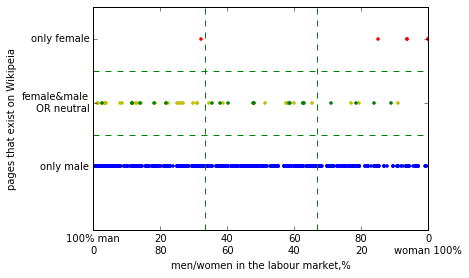

In [12]:
f_=f_df.Frauen.tolist()
n_=n_df.Frauen.tolist()
m_=m_df.Frauen.tolist()
n_n_=n_n_df.Frauen.tolist()

fig1 = pyplot.figure()
pyplot.xlabel('men/women in the labour market,%')
pyplot.ylabel('pages that exist on Wikipeia')
pyplot.xlim(0,100)
pyplot.ylim(0,3.5)
min_x,max_x,min_y,max_y = pyplot.axis()
p1,=pyplot.plot(f_,[3]*len(f_),".",c="r")
p4,=pyplot.plot(n_n_,[2]*len(n_n_),".",c="y")
p2,=pyplot.plot(n_,[2]*len(n_),".",c="g")
p3,=pyplot.plot(m_,[1]*len(m_),".",c="b")

pyplot.yticks([1,2,3],["only male","female&male\n OR neutral","only female"])
pyplot.xticks(np.arange(0, 101, 20),["100% man\n0","20\n80","40\n60","60\n40","80\n20","0\nwoman 100%"])

line,=pyplot.plot([66.7]*2,[min_y,max_y],"--",c="g")
line,=pyplot.plot([33.4]*2,[min_y,max_y],"--",c="g")
line,=pyplot.plot([min_x,max_x],[2.5]*2,"--",c="g")
line,=pyplot.plot([min_x,max_x],[1.5]*2,"--",c="g")

In [13]:
from scipy import stats  
  
z_stat, p_val = stats.ranksums(m_, f_)  
  
print "MWW RankSum P for male and female distributions =", p_val 
z_stat, p_val = stats.ranksums(m_, n_)  
  
print "MWW RankSum P for male and neutral distributions =", p_val 
z_stat, p_val = stats.ranksums(n_, f_)  
  
print "MWW RankSum P for neutral and female distributions =", p_val 

MWW RankSum P for male and female distributions = 0.000931238156522
MWW RankSum P for male and neutral distributions = 0.23404526299
MWW RankSum P for neutral and female distributions = 0.00616989932054


# Plot for existing pages

In [14]:
f_val=load_simple_json('de/wiki/f_page_validated.json')
f_amb=load_simple_json('de/wiki/f_page_ambigious.json')
n_pages=load_simple_json('de/wiki/n_page_validated.json')

words=load_simple_json('de/occupation_all.json')
words_revert={words[i][1]:i for i in words}#feminine:masculine
f_val_m=[]
f_val_m_onlyval=[]
for i in f_val:
    f_val_m.append(words_revert[i])
    f_val_m_onlyval.append(words_revert[i])
for i in f_amb:
    f_val_m.append(words_revert[i])

In [15]:
all_together[all_together["name"].isin(f_val_m)]

,Berufsgruppe,Frauen,KldB,KldB5,Männer,Overall,name
0,"Obj.Pers.Brandschutz,Arbeitssicherh(ssT)",37.700505,5318,53182,62.299495,8915,Hilfspolizist
3,Führung - Allgemeinbildende Schulen,62.997543,8419,84194,37.002457,2035,Direktor
4,Berufe für Post- und Zustelldienste,47.894039,5132,51321,52.105961,205963,Bote
5,"Autoren/Autorinnen, Schriftsteller/innen",47.783251,9243,92434,52.216749,812,Dichter
6,Angehörige gesetzgebender Körperschaften,18.156809,7121,71214,81.843191,2908,Bundeskanzler
7,Berufe in der Gemeindearbeit,58.613996,8332,83323,41.386004,10303,Diakon
10,"Angehörige geistl. Orden, Mutterhäuser",62.571104,8333,83332,37.428896,879,Mönch
11,"Berufe im Veranstaltungsservice,-manag.",58.326084,6340,63401,41.673916,27588,Host
13,Berufe in der Landwirtschaft (o.S.),21.576590,1110,11101,78.423410,124357,Knecht
14,"Apotheker, Pharmazeuten",83.810209,8180,81804,16.189791,37536,Apotheker


In [16]:
all_together[all_together["name"].isin(n_pages)]

,Berufsgruppe,Frauen,KldB,KldB5,Männer,Overall,name
20,Berufe in der Elektrotechnik (o.S.),25.599873,2630,26302,74.400127,220505,Elektrofachkraft
21,"Berufe Wasserversorgung,Abwassertechnik",3.556357,3431,34312,96.443643,27725,Fachkraft für Wasserversorgungstechnik
22,"Athleten, Berufssportler",8.496605,9424,94243,91.503395,5155,Jockey
23,"Berufe im Holz-, Möbel-, Innenausbau",3.901460,2234,22342,96.098540,143049,"Fachkraft für Möbel-, Küchen- und Umzugsservice"
24,Berufe in der Wasserwirtschaft,29.759646,3114,31142,70.240354,3162,Fachkraft für Wasserwirtschaft
25,Berufe in der Metallbearbeitung (o.S.),18.449343,2420,24202,81.550657,396735,Fachkraft für Metalltechnik
26,"Berufe im Objekt-,Werte-, Personenschutz",31.087103,5311,53112,68.912897,212059,Fachkraft für Schutz und Sicherheit
27,Berufe im Gastronomieservice (o.S.),65.264831,6330,63302,34.735169,391439,Fachkraft im Gastgewerbe
28,Berufe i.d. Lebensmittelherstellung (oS),38.666751,2920,29202,61.333249,126398,Fachkraft für Lebensmitteltechnik
29,Berufe in der Abfallwirtschaft,8.069793,3433,34332,91.930207,11004,Fachkraft für Kreislauf- und Abfallwirtschaft


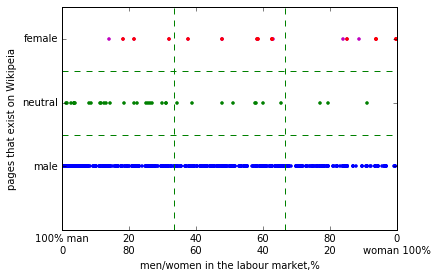

In [17]:
f_=all_together[all_together["name"].isin(f_val_m)].Frauen.tolist()
f_onlyval=all_together[all_together["name"].isin(f_val_m_onlyval)].Frauen.tolist() #f_val_m_onlyval
n_=all_together[all_together["name"].isin(n_pages)].Frauen.tolist()
m_=m_df.Frauen.tolist()

fig1 = pyplot.figure()
pyplot.xlabel('men/women in the labour market,%')
pyplot.ylabel('pages that exist on Wikipeia')
pyplot.xlim(0,100)
pyplot.ylim(0,3.5)
min_x,max_x,min_y,max_y = pyplot.axis()
p1,=pyplot.plot(f_,[3]*len(f_),".",c="m")
p2,=pyplot.plot(n_,[2]*len(n_),".",c="g")
p3,=pyplot.plot(m_,[1]*len(m_),".",c="b")
p4,=pyplot.plot(f_onlyval,[3]*len(f_onlyval),".",c="r")


pyplot.yticks([1,2,3],["male","neutral","female"])
pyplot.xticks(np.arange(0, 101, 20),["100% man\n0","20\n80","40\n60","60\n40","80\n20","0\nwoman 100%"])

line,=pyplot.plot([66.7]*2,[min_y,max_y],"--",c="g")
line,=pyplot.plot([33.4]*2,[min_y,max_y],"--",c="g")
line,=pyplot.plot([min_x,max_x],[2.5]*2,"--",c="g")
line,=pyplot.plot([min_x,max_x],[1.5]*2,"--",c="g")

Then we check wheather all groups follow the same distribution. In order to do so, we perform Mann-Whitney-Wilcoxon RankSum test. The null hypothesis is that all instances of two groups 

In [18]:
import seaborn as sns
sns.set(color_codes=True)

c:\anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


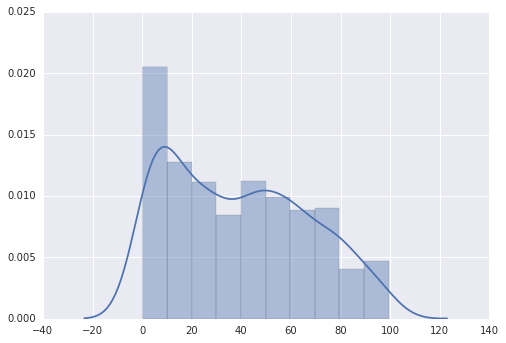

In [19]:
sns.distplot(m_)

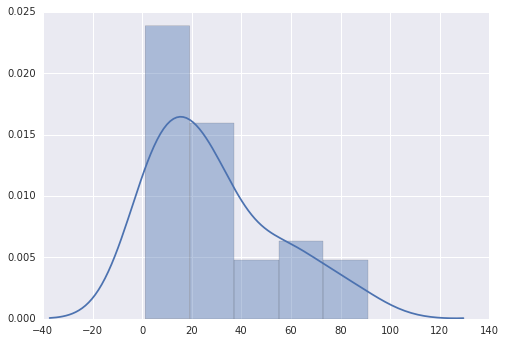

In [20]:
sns.distplot(n_)

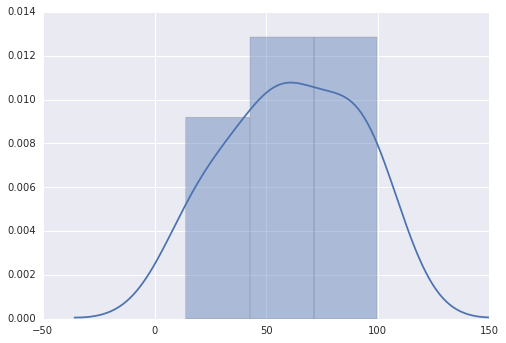

In [21]:
sns.distplot(f_)

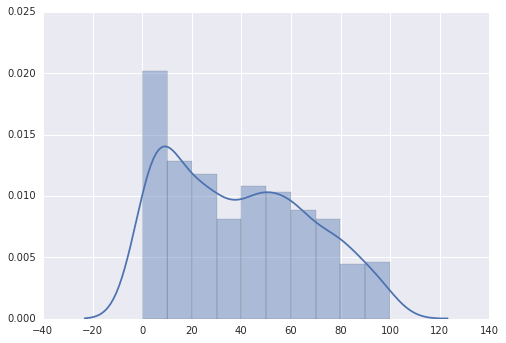

In [22]:
sns.distplot(f_+m_+n_)

The null hypothesis is that all instances of X and Y are independent and identically distributed (iid).

Let us take as the alternate hypothesis that (a) all instances of X are iid according to some underlying distribution F_X and (b) all instances of Y are iid according to some underlying distribution F_Y but (c) F_X differs from F_Y. 

Mann-Whitney-Wilcoxon (MWW) RankSum test
The MWW RankSum test is a useful test to determine if two distributions are significantly different or not.

In [23]:
from scipy import stats  
  
z_stat, p_val = stats.ranksums(m_, f_)  
  
print "MWW RankSum P for male and female distributions =", p_val 
z_stat, p_val = stats.ranksums(m_, n_)  
  
print "MWW RankSum P for male and neutral distributions =", p_val 
z_stat, p_val = stats.ranksums(n_, f_)  
  
print "MWW RankSum P for neutral and female distributions =", p_val 

MWW RankSum P for male and female distributions = 0.00110797889391
MWW RankSum P for male and neutral distributions = 0.0472717866762
MWW RankSum P for neutral and female distributions = 0.00018372471647


In [24]:
z_stat, p_val = stats.ranksums(m_+f_+n_, f_)  
  
print "MWW RankSum P for all pages and female =", p_val 

MWW RankSum P for all pages and female = 0.00116562287403


# the Kolmogorov-Smirnov test

In [25]:
from scipy.stats import ks_2samp,ttest_1samp,kstest
ks_2samp(m_, n_)

Ks_2sampResult(statistic=0.22916435056512879, pvalue=0.050068161089428416)

In [26]:
ks_2samp(m_, f_)

Ks_2sampResult(statistic=0.35401733906751315, pvalue=0.013921935294695698)

In [27]:
ks_2samp(m_+n_+f_, m_)

Ks_2sampResult(statistic=0.0048814998231340168, pvalue=0.99999999999999956)

In [28]:
ks_2samp(m_+n_+f_, f_)

Ks_2sampResult(statistic=0.35157894736842105, pvalue=0.014794143664941058)

In [29]:
ks_2samp(m_+n_+f_, n_)

Ks_2sampResult(statistic=0.22632034632034631, pvalue=0.05429114425089903)

# ANOVA analysis

In [30]:
#ANOVA analysis of variance    
f_val, p_val = stats.f_oneway(m_, n_, f_)  
  
print "One-way ANOVA P =", p_val   

One-way ANOVA P = 0.000239877674953
